In [80]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Dirichlet distribution

In [91]:
def translate(x, y):
    c = 2/np.sqrt(3) * x
    b = y - 1/np.sqrt(3) * x
    a = 1 - b - c
    return np.array([a, b, c])

In [248]:
def get_dirichlet_pdfs(alpha):
    delta = 0.005
    d = 10**(-10)
    y = np.arange(0+d, 1+delta-d, delta)
    x = np.arange(0+d, np.sqrt(3)/2+delta-d, delta)
    X, Y = np.meshgrid(x, y)
    pdfs = np.zeros((X.shape[0], X.shape[1]))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            quantiles = translate(X[i,j], Y[i,j])
            if sum(quantiles)>1 or any(quantiles<0):
                pdfs[i,j] = 0
            else:
                pdfs[i,j] = st.dirichlet.pdf(quantiles, alpha)
    return X, Y, pdfs

In [254]:
def plot_dirichlet(ax, pdfs, alpha):
    ax.imshow(pdfs, interpolation='bicubic', cmap=cm.afmhot_r,
               origin='lower', extent=[0, np.sqrt(3)/2, 0, 1],
               vmax=cmax, vmin=abs(pdfs).min())
    ax.plot([0,np.sqrt(3)/2], [0,0.5], c="black")
    ax.plot([0,np.sqrt(3)/2], [1,0.5], c="black")
    ax.set_xlim(0,np.sqrt(3)/2)
    ax.set_title(f"{alpha}")
    return ax

In [221]:
cmax = 12

In [258]:
alpha = [1, 1, 1]
X, Y, pdfs_1 = get_dirichlet_pdfs(alpha)
alpha = [2, 2, 2]
X, Y, pdfs_2 = get_dirichlet_pdfs(alpha)
alpha = [5, 5, 5]
X, Y, pdfs_3 = get_dirichlet_pdfs(alpha)
alpha = [2, 5, 5]
X, Y, pdfs_4 = get_dirichlet_pdfs(alpha)
alpha = [2, 2, 5]
X, Y, pdfs_5 = get_dirichlet_pdfs(alpha)
alpha = [0.7, 0.7, 0.7]
X, Y, pdfs_6 = get_dirichlet_pdfs(alpha)

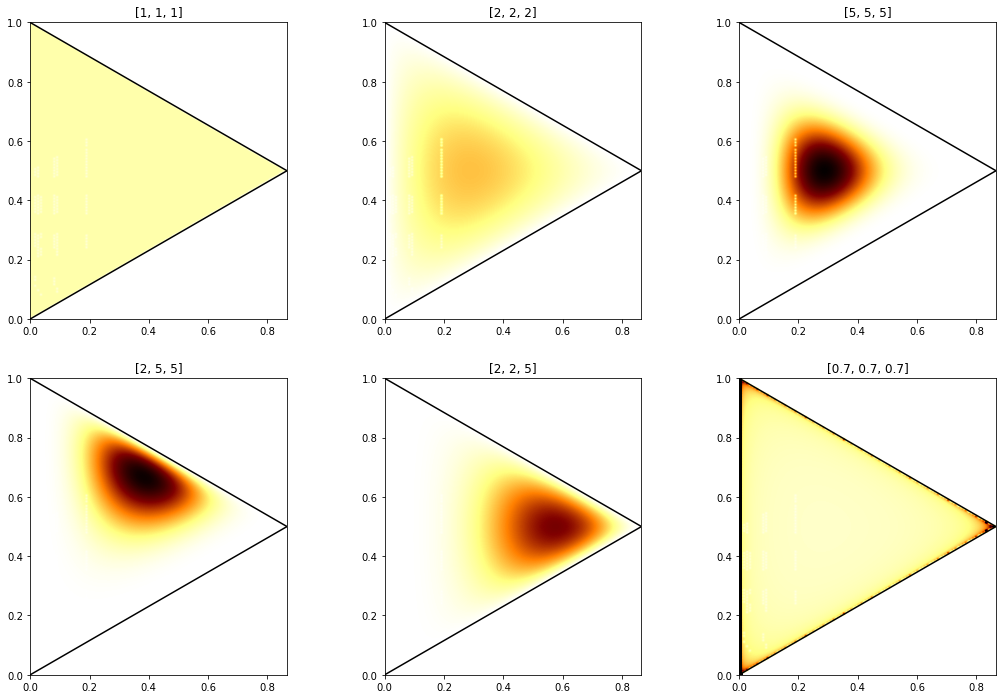

In [262]:
fig, axs = plt.subplots(2, 3, figsize=(18,12))
plot_dirichlet(axs[0][0], pdfs_1, [1, 1, 1])
plot_dirichlet(axs[0][1], pdfs_2, [2, 2, 2])
plot_dirichlet(axs[0][2], pdfs_3, [5, 5, 5])
plot_dirichlet(axs[1][0], pdfs_4, [2, 5, 5])
plot_dirichlet(axs[1][1], pdfs_5, [2, 2, 5])
plot_dirichlet(axs[1][2], pdfs_6, [0.7, 0.7, 0.7]);